In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
Combined_Results = mouse_metadata.merge(study_results, on="Mouse ID")

# Display the data table for preview
Combined_Results.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
Duplicate_Mouse = Combined_Results.loc[Combined_Results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
Duplicate_Mouse

array(['g989'], dtype=object)

In [6]:
Cleaned_df = Combined_Results[Combined_Results["Mouse ID"].isin(Duplicate_Mouse)==False]
Cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
Capomulin_df = Cleaned_df[Cleaned_df["Drug Regimen"]=="Capomulin"]
Capomulin_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


<IPython.core.display.Javascript object>


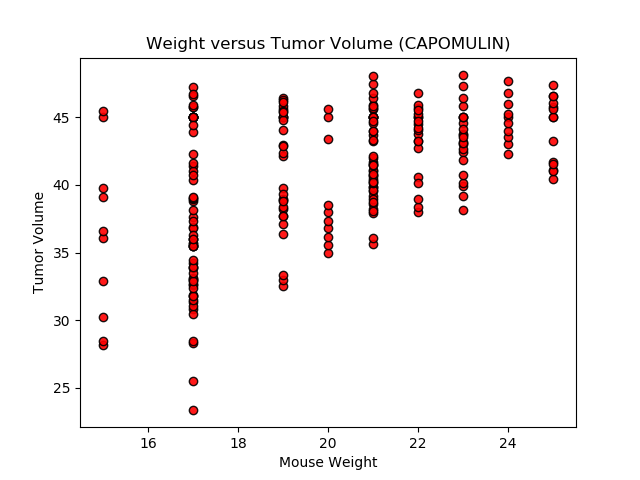

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df = Cleaned_df[Cleaned_df["Drug Regimen"]=="Capomulin"]
Capomulin_df
Mouse_weight = Capomulin_df["Weight (g)"]
Mouse_weight
Tumor_Volume_C = Capomulin_df["Tumor Volume (mm3)"]
Tumor_Volume_C

plt.scatter(Mouse_weight, Tumor_Volume_C, marker="o", facecolors="red", edgecolors="black",
            s=None, alpha=0.90)
plt.title("Weight versus Tumor Volume (CAPOMULIN)")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()